In [8]:
%load_ext autoreload
%autoreload 2

%pylab inline
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')

import eternabench as eb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


In this notebook:

- [x] Fig. 1C -- example heatmaps

- [x] Fig. S1 -- Pearson correlations for all packages tested, Round 1

- [x] Fig. S2 -- Example heatmaps for all package options tested

- [ ] Fig. S4 -- max. correlation plot for temperature > find

- [ ] Fig. S5 -- example heatmaps from all rounds > need to make dataset that is just subset of example packages

In [28]:
data = eb.load_CM_example_calculations()
packages = eb.plot.get_packages() # dataframe containing information (full Title, color category) about each package

Loading EternaBench ChemMapping Round 1 with example calculations


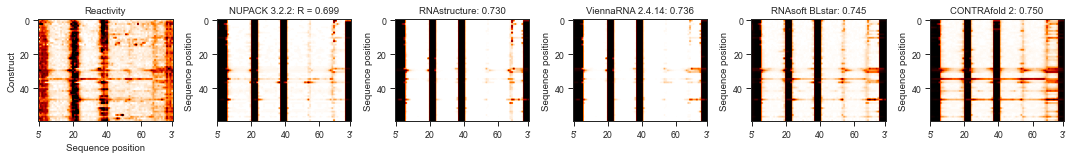

In [5]:
example_package_list=['nupack_99','rnastructure', 'vienna_2', 'rnasoft_blstar','contrafold_2']
titles = ['NUPACK 3.2.2: R = 0.699', 'RNAstructure: 0.730', 'ViennaRNA 2.4.14: 0.736', 'RNAsoft BLstar: 0.745', 'CONTRAfold 2: 0.750']

figure(figsize=(15,6))
subplot(1,6,1)

eb.plot.reactivity_heatmap(data, ind_range=[0,60])
#colorbar(fraction=0.04)
title('Reactivity')
xticks([0,20,40,60, 78],["5'",20, 40, 60, "3'"])

for i, package in enumerate(example_package_list):
    subplot(1,6,i+2)
    title("%s" % titles[i])
    eb.plot.punpaired_heatmap(data, ind_range=[0,60], package=package)
    #colorbar(fraction=0.04)
    xticks([0,20,40,60, 78],["5'",20, 40, 60, "3'"])
    xlabel('')

tight_layout()
savefig('FIGURES/1/1C.pdf',bbox_inches='tight')

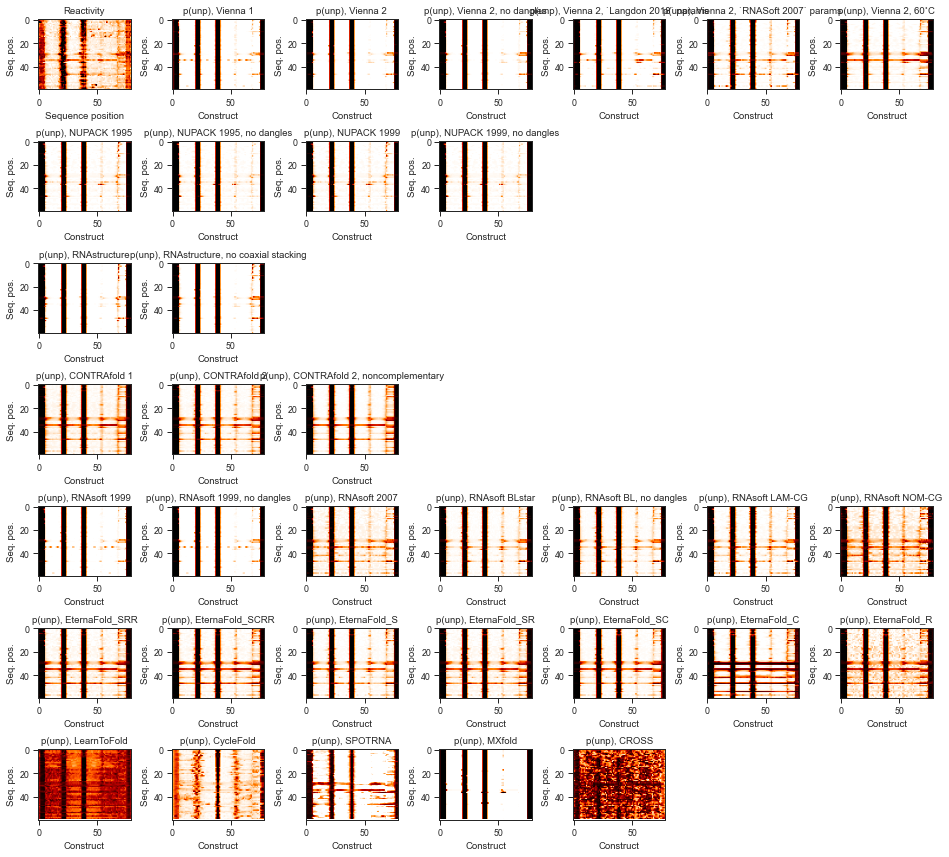

In [22]:
figure(figsize=(15,15))
subplot(9,8,1)
ctr=0
eb.plot.reactivity_heatmap(data, ind_range=[0,60])
title('Reactivity')
ylabel('Seq. pos.')

for j, pkg_kind in enumerate(packages.category.unique()):
    tmp = packages.loc[packages.category==pkg_kind]
    ctr=1
    for _, row in tmp.iterrows():
        if 'p_'+row['package'] in data.keys():
            if j==0:
                subplot(9,8,j*8+ctr+1)
            else:
                subplot(9,8,j*8+ctr)
            eb.plot.punpaired_heatmap(data, ind_range=[0,60], package=row['package'])
            ylabel('Seq. pos.')
            title("p(unp), %s" % row['title'])

        ctr+=1

tight_layout()
savefig('FIGURES/SI/Figure_S2_heatplots_all_packages.pdf',bbox_inches='tight')
savefig('FIGURES/SI/Figure_S2_heatplots_all_packages.png',dpi=150, bbox_inches='tight')

In [34]:
stats = eb.load_CM_example_correlations()
stats = stats.merge(packages, on='package',how='left')
stats = stats.sort_values('mean')

stats = stats.loc[stats.category!='EternaFold']

palette, hue_order = eb.plot.get_palette()
hue_order = hue_order[:-1]
palette = palette[:-1]

Loading bootstrapped pearson correlations for EternaBench ChemMapping Round 1


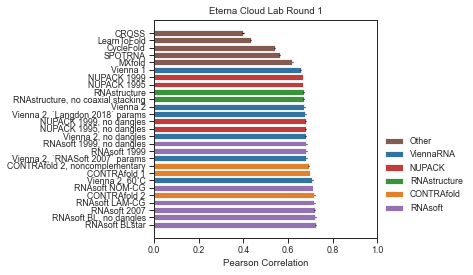

In [38]:
figure(figsize=(4,4))
sns.barplot(y='title',x='mean',data=stats,hue='category',palette=palette, hue_order=hue_order, dodge=False)
errorbar(stats['mean'], range(len(stats)), xerr=stats['std'],fmt='.',color='k',markersize=0)
xlabel('Pearson Correlation')
title('Eterna Cloud Lab Round 1')
xlim([0,1])
ylabel('')
legend(bbox_to_anchor=(1,0.5),frameon=False)
savefig('FIGURES/SI/Figure_S1_Rnd1_other_packages.pdf',bbox_inches='tight')
savefig('FIGURES/SI/Figure_S1_Rnd1_other_packages.png',dpi=150, bbox_inches='tight')